In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pypsa
import pandas as pd
import numpy as np

plt.style.use(["bmh", "../../matplotlibrc"])
sns.set_palette("colorblind")

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

from plot import get_load_duration


In [2]:
voll_files = {
    1: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+1-voll+true.nc",
    4: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+4-voll+true.nc",
    16: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+16-voll+true.nc",
    32: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+32-voll+true.nc",
    70: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+70-voll+true.nc",
}
ns_voll = {k: pypsa.Network(v) for k, v in voll_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+1-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+4-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+16-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+32-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+70-voll+true.nc has buses, carriers, generators, links, stores


In [3]:
pwl_files = {
    1: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+1-elastic_pwl+default.nc",
    4: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+4-elastic_pwl+default.nc",
    16: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+16-elastic_pwl+default.nc",
    32: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+32-elastic_pwl+default.nc",
    70: "../../results/20240426-num-years/network_solved_LT-country+DE-number_years+70-elastic_pwl+default.nc",
}
ns_pwl = {k: pypsa.Network(v) for k, v in pwl_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+1-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+4-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+16-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+32-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+70-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores


In [4]:
voll_st_files = {
    "LT": "../../results/20240424-70a/network_solved_LT-country+DE-voll+true.nc",
    "ST": "../../results/20240424-70a/network_myopic_LT-country+DE-voll+true_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc",
    "ST - capacities +5%": "../../results/20240424-70a/network_myopic_LT-country+DE-voll+true_ST-horizon+96-overlap+48-perturbation+1.05.nc",
    "ST - capacities -5%": "../../results/20240424-70a/network_myopic_LT-country+DE-voll+true_ST-horizon+96-overlap+48-perturbation+0.95.nc",
}
ns_voll_st = {k: pypsa.Network(v) for k, v in voll_st_files.items()}


INFO:pypsa.io:Imported network network_solved_LT-country+DE-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true_ST-horizon+96-overlap+48-perturbation+1.05.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-voll+true_ST-horizon+96-overlap+48-perturbation+0.95.nc has buses, carriers, generators, links, stores


In [5]:
pwl_st_files = {
    "LT": "../../results/20240424-70a/network_solved_LT-country+DE-elastic_pwl+default.nc",
    "ST": "../../results/20240424-70a/network_myopic_LT-country+DE-elastic_pwl+default_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc",
    "ST - capacities +5%": "../../results/20240424-70a/network_myopic_LT-country+DE-elastic_pwl+default_ST-horizon+96-overlap+48-perturbation+1.05.nc",
    "ST - capacities -5%": "../../results/20240424-70a/network_myopic_LT-country+DE-elastic_pwl+default_ST-horizon+96-overlap+48-perturbation+0.95.nc",
}
ns_pwl_st = {k: pypsa.Network(v) for k, v in pwl_st_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic_pwl+default_ST-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic_pwl+default_ST-horizon+96-overlap+48-perturbation+1.05.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-elastic_pwl+default_ST-horizon+96-overlap+48-perturbation+0.95.nc has buses, carriers, generators, links, loads, stores


In [6]:
voll_myopic_files = {
    "LT": "../../results/20240424-35a-35a/network_solved_LT-country+DE-number_years+35-voll+true.nc",
    "ST perfect foresight": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc",
    "ST myopic": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48.nc",
    # "ST myopic / capacities +1%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+1.01.nc",
    # "ST myopic / capacities -1%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+0.99.nc",
    "ST myopic / capacities +5%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc",
    "ST myopic / capacities -5%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc",
}
ns_voll_myopic = {k: pypsa.Network(v) for k, v in voll_myopic_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+35-voll+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc has buses, carriers, generators, links, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-voll+true_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc has buses, carriers, generators, links, stores


In [7]:
pwl_myopic_files = {
    "LT": "../../results/20240424-35a-35a/network_solved_LT-country+DE-number_years+35-elastic_pwl+default.nc",
    "ST perfect foresight": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc",
    "ST myopic": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48.nc",
    # "ST myopic / capacities +1%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+1.01.nc",
    # "ST myopic / capacities -1%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+0.99.nc",
    "ST myopic / capacities +5%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc",
    "ST myopic / capacities -5%": "../../results/20240424-35a-35a/network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc",
}
ns_pwl_myopic = {k: pypsa.Network(v) for k, v in pwl_myopic_files.items()}

INFO:pypsa.io:Imported network network_solved_LT-country+DE-number_years+35-elastic_pwl+default.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-perfect_foresight+true-hydrogen_bid+0-battery_bid+0-cyclic+true.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+1.05.nc has buses, carriers, generators, links, loads, stores
INFO:pypsa.io:Imported network network_myopic_LT-country+DE-number_years+35-elastic_pwl+default_ST-number_years+35-horizon+96-overlap+48-perturbation+0.95.nc has buses, carriers, generators, links, loads, 

In [8]:
ldc_voll = {k: get_load_duration(v) for k, v in ns_voll.items()}
ldc_pwl = {k: get_load_duration(v) for k, v in ns_pwl.items()}

ldc_voll_st = {k: get_load_duration(v) for k, v in ns_voll_st.items()}
ldc_pwl_st = {k: get_load_duration(v) for k, v in ns_pwl_st.items()}

ldc_voll_myopic = {k: get_load_duration(v) for k, v in ns_voll_myopic.items()}
ldc_pwl_myopic = {k: get_load_duration(v) for k, v in ns_pwl_myopic.items()}

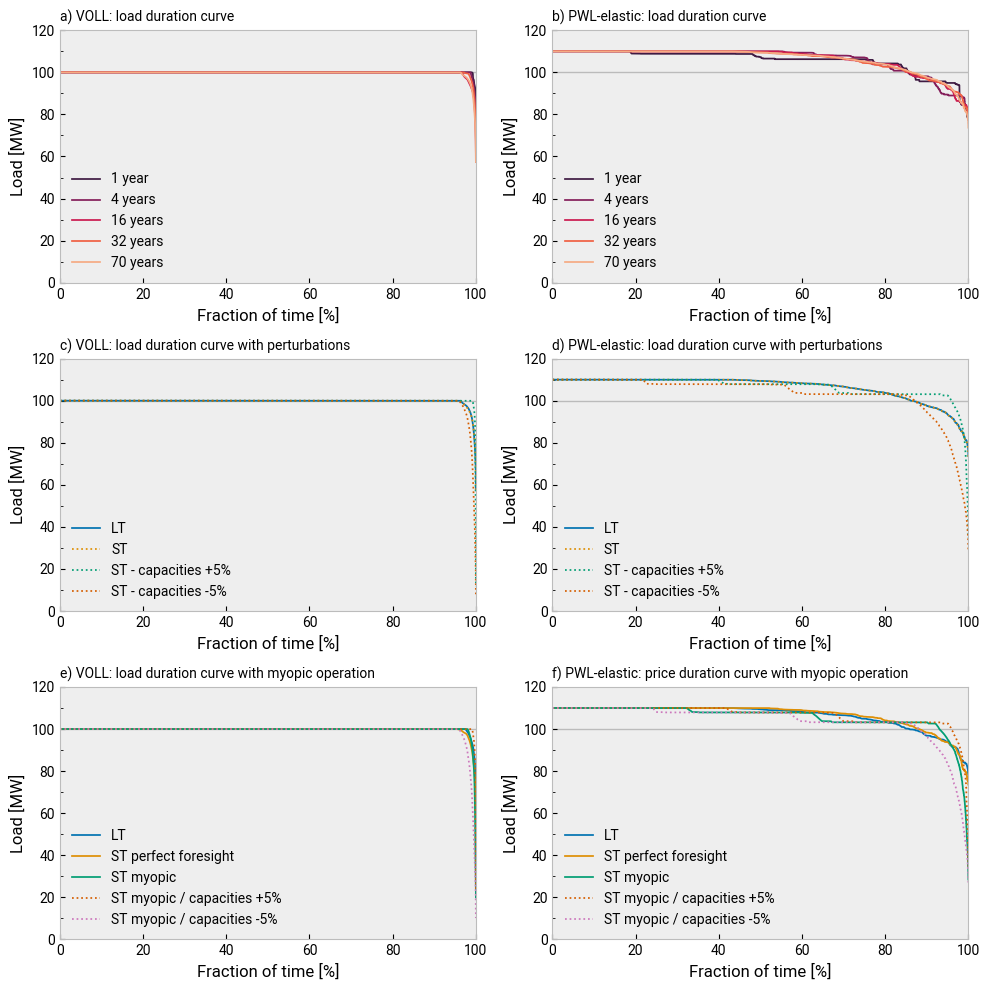

In [9]:
pu_colors = sns.color_palette("rocket", 5)
cat_colors = sns.color_palette("colorblind")
lw = 1.25

fig, axs = plt.subplots(3, 2, figsize=(10, 10))

for i, (ys, ldc) in enumerate(ldc_voll.items()):
    label = f"{ys} year" if ys == 1 else f"{ys} years"
    ldc.plot(ax=axs[0,0], label=label, color=pu_colors[i], linewidth=lw)

for i, (ys, ldc) in enumerate(ldc_pwl.items()):
    label = f"{ys} year" if ys == 1 else f"{ys} years"
    ldc.plot(ax=axs[0,1], label=label, color=pu_colors[i], linewidth=lw)

for i, (key, ldc) in enumerate(ldc_voll_st.items()):
    ls = ":" if key != "LT" else "-"
    ldc.plot(ax=axs[1,0], label=key, color=cat_colors[i], linestyle=ls, linewidth=lw)

for i, (key, ldc) in enumerate(ldc_pwl_st.items()):
    ls = ":" if key != "LT" else "-"
    ldc.plot(ax=axs[1,1], label=key, color=cat_colors[i], linestyle=ls, linewidth=lw)

for i, (key, ldc) in enumerate(ldc_voll_myopic.items()):
    ls = ":" if "capacities" in key else "-"
    ldc.plot(ax=axs[2,0], label=key, color=cat_colors[i], linestyle=ls, linewidth=lw)

for i, (key, ldc) in enumerate(ldc_pwl_myopic.items()):
    ls = ":" if "capacities" in key else "-"
    ldc.plot(ax=axs[2,1], label=key, color=cat_colors[i], linestyle=ls, linewidth=lw)

axs[0,0].set_title("a) VOLL: load duration curve", loc='left', fontsize='medium')
axs[0,1].set_title("b) PWL-elastic: load duration curve", loc='left', fontsize='medium')

axs[1,0].set_title("c) VOLL: load duration curve with perturbations", loc='left', fontsize='medium')
axs[1,1].set_title("d) PWL-elastic: load duration curve with perturbations", loc='left', fontsize='medium')

axs[2,0].set_title("e) VOLL: load duration curve with myopic operation", loc='left', fontsize='medium')
axs[2,1].set_title("f) PWL-elastic: price duration curve with myopic operation", loc='left', fontsize='medium')

for i in range(3):
    for j in range(2):
        axs[i,j].set_xlabel("Fraction of time [%]")
        axs[i,j].axhline(100, linewidth=1, color='#bbb', zorder=0)
        axs[i,j].set_xlim(0, 100)
        axs[i,j].legend()
        axs[i,j].set_ylim(0, 120)
        axs[i,j].set_ylabel("Load [MW]")
        axs[i,j].set_yticks(range(0, 121, 20))
        axs[i,j].set_yticks(range(0, 121, 10), minor=True)

for ext in ['png', 'pdf']:
    plt.savefig(f"../../resources/figure-ldc.{ext}", bbox_inches='tight', dpi=300)